#### Import necessary modules and packages

In [2]:
# Installing packages if we haven't yet
!pip install -r requirements.txt   # Optional, might ignore this requirements.txt as it's used for creating virtual environment 
!pip install nltk  # Must install NLTK used for NLP tasks
!pip install vaderSentiment # Sentiment analysis tool
!pip install textstat # Readability analysis tool 
!pip install wordcloud # Word cloud visualization tool 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Importing data processing tools 
import pandas as pd
import nltk
import re

# Import visualization tools 
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [4]:
# Load each Fake and True dataset into dataframe
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

print(f'df_fake shape: {df_fake.shape}')
print(f'df_true shape: {df_true.shape}')

df_fake shape: (23481, 4)
df_true shape: (21417, 4)


In [5]:
# Show df_fake 
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
# Show df_true
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
# Check for missing values
df_fake.isnull().sum()
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
# Check the data types
df_fake.dtypes
df_true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [9]:
# Add labels for each of the dataset using integer values 1 and 0 (Fake = 1, True = 0)
df_fake['label'] = 1
df_true['label'] = 0

In [10]:
# Combine two datasets into one df
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)
orig_shape = df.shape
# Check for missing value and data shape
print(f'df shape {orig_shape}')
print(df.isnull().sum())

# Preview data
df.head()

df shape (44898, 5)
title      0
text       0
subject    0
date       0
label      0
dtype: int64


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


Note: Even though there is no NULL values in the df, there is possiblities that the values are empty strings. 

## Step 1: Data cleaning

In [11]:
'''Funtion to check if there is an empty string in a column
param @text: a column of df
print @empty: number of rows with empty str'''

def empty_check(text):
    empty = 0
    for t in text:
        if t.strip() == "":
            empty += 1
    print(f'There are {empty} rows with empty string in the column')

print('text column:') 
empty_check(df['text'])

print('title column: ') 
empty_check(df['title'])

print('date column:')
empty_check(df['date'])
 
print('subject column:')
empty_check(df['subject'])


text column:
There are 631 rows with empty string in the column
title column: 
There are 0 rows with empty string in the column
date column:
There are 0 rows with empty string in the column
subject column:
There are 0 rows with empty string in the column


In [12]:
# Show a few rows with empty string in 'text' column 
empty_rows = df_fake[df_fake['text'].str.strip() == ""]
empty_rows

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",1
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",1
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",1
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",1
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",1
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",1
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",1
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",1
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",1


Note: Majority of the empty string 'text' are Fake news (630 rows). Only 1 row of True news with empty string 'text'. 

In [13]:
# Subject variations of Fake news with empty string text 
print(empty_rows['subject'].value_counts())

subject
politics           408
left-news          150
Government News     72
Name: count, dtype: int64


In [14]:
# Subjects of Fake news in the whole dataset
df_fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

Note: Since 631 rows of emptry string is not majority compared to the size of the dataset, we will drop them. 

In [15]:
# Remove the rows with empty strings on df
# df is now ready to work on
df = df[df['text'].str.strip() != ""].reset_index(drop=True)
print(f'df shape: {df.shape}. Original shape: {orig_shape}')
df

df shape: (44267, 5). Original shape: (44898, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44262,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44263,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44264,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44265,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [16]:
# Ensure there is no empty string in any columns
print('text column:') 
empty_check(df['text'])

print('title column: ') 
empty_check(df['title'])

print('date column:')
empty_check(df['date'])

print('subject column:')
empty_check(df['subject'])

text column:
There are 0 rows with empty string in the column
title column: 
There are 0 rows with empty string in the column
date column:
There are 0 rows with empty string in the column
subject column:
There are 0 rows with empty string in the column


## Step 2: Feature extractions and Text Preprocessing

### Create categorical features and numerical features 

In [17]:
'''Function to detect missing apostrophes in contractions
    param @text: a column in df
    return @label int value either 1 or 0 (1 = missing apostrophe, 0 = not missing)
'''
def detect_missing_apostrophes(text):
    missing_apostrophe_patterns = [
        r"\barent\b", 
        r"\bcant\b",
        r"\bcouldnt\b", 
        r"\bdidnt\b",
        r"\bdoesnt\b",
        r"\bdont\b",
        r"\bhadnt\b",
        r"\bhasnt\b",  
        r"\bhavent\b",  
        r"\bshant\b",
        r"\bshouldnt\b",  
        r"\bthats\b",  
        r"\bthiss\b",  
        r"\btheres\b",
        r"\bwhatll\b",
        r"\bwhatre\b",  
        r"\bwhatve\b",  
        r"\bwhod\b",
        r"\bwouldnt\b", r"\baren t\b",
        r"\bcan t\b",
        r"\bcouldn t\b", 
        r"\bdidn t\b",
        r"\bdoesn t\b",
        r"\bdon t\b",
        r"\bhadn t\b",
        r"\bhasn t\b",  
        r"\bhaven t\b",  
        r"\bshan t\b",
        r"\bshouldn t\b",  
        r"\bthat s\b",  
        r"\bthis s\b",  
        r"\bthere s\b",
        r"\bwhat ll\b",
        r"\bwhat re\b",  
        r"\bwhat ve\b",  
        r"\bwho d\b",
        r"\bwould nt\b"            
    ]

    # Find and label if the text including contractions is missing apostrophes
    for pattern in missing_apostrophe_patterns:
        if re.search(pattern, text):
            return 1 # Mark 1 if there's a missing apostrophe in contractions
    return 0 # Mark 0 if there is no missing apostrophe in contractions 

In [18]:
# Create a feature column for 'contractions missing apostrophes' in text 
df['contractions missing apostrophe'] = df['text'].apply(detect_missing_apostrophes)
df.head() # takes about 27 seconds 

,title,text,subject,date,label,contractions missing apostrophe
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,0


In [19]:
# Examine the percentage of Fake news missing apostrophes in contractions
fake_missing_apostrophe = 0 
for label, missing in zip(df['label'], df['contractions missing apostrophe']):
    if label == 1 & missing == 1:
        fake_missing_apostrophe += 1

print(f'Fake news missing apostrophe percentage: {fake_missing_apostrophe/(df_fake.shape[0]-630)*100:.2f}%')  #subtract 630 of the dropping empty string rows in Fake news


Fake news missing apostrophe percentage: 60.36%


In [20]:
# Examine the percentage of True news missing apostrophes in contractions
true_missing_apostrophe = 0 
for label, missing in zip(df['label'], df['contractions missing apostrophe']):
    if label == 0 & missing == 1:
        true_missing_apostrophe += 1

print(f'True news missing apostrophe percentage: {true_missing_apostrophe/df_true.shape[0]*100:.2f}%')


True news missing apostrophe percentage: 0.00%


In [21]:
# Create a feature that counts how many URLs included in the text
'''Function to count number of links
param @text a column of text
return @url_counts
'''
def count_urls(text):
    urls = re.findall(r'https?://\S+|www\.\S+', text) 
    url_counts = len(urls)
    return url_counts

In [22]:
# Apply function to create a new column 'url counts' in text
df['url counts'] = df['text'].apply(count_urls)

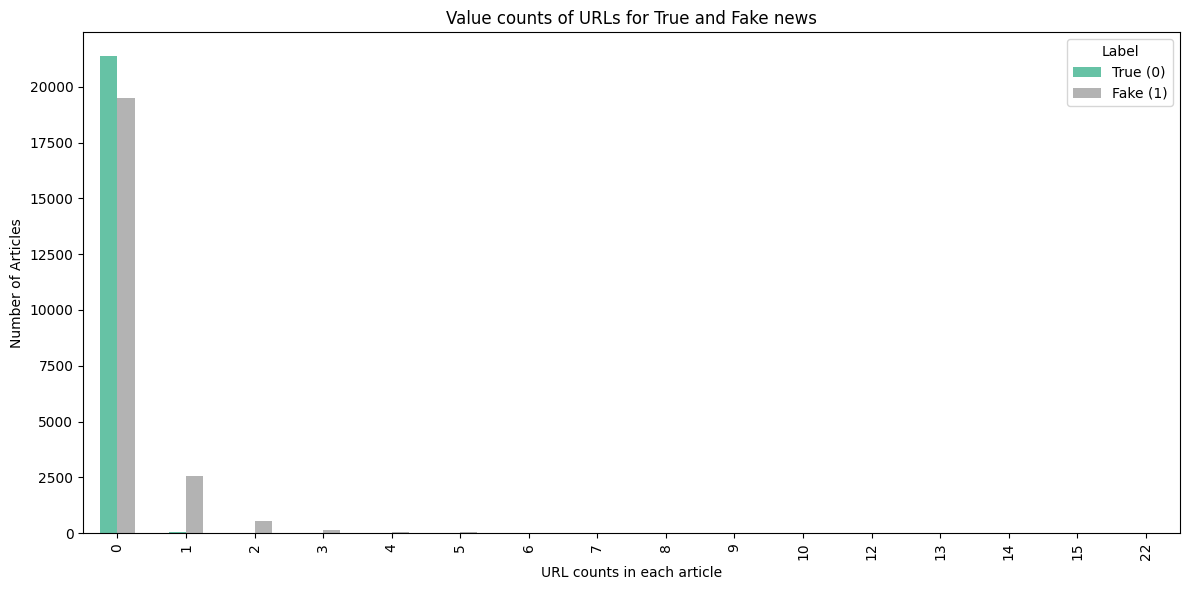

In [23]:
# Group and count values of url counts for each label
grouped_filtered = df.groupby(['url counts', 'label']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped_filtered.plot(kind='bar', figsize=(12,6), colormap='Set2')

plt.title('Value counts of URLs for True and Fake news')
plt.xlabel('URL counts in each article')
plt.ylabel('Number of Articles')
plt.legend(title='Label', labels=['True (0)', 'Fake (1)'])
plt.tight_layout()
plt.show()



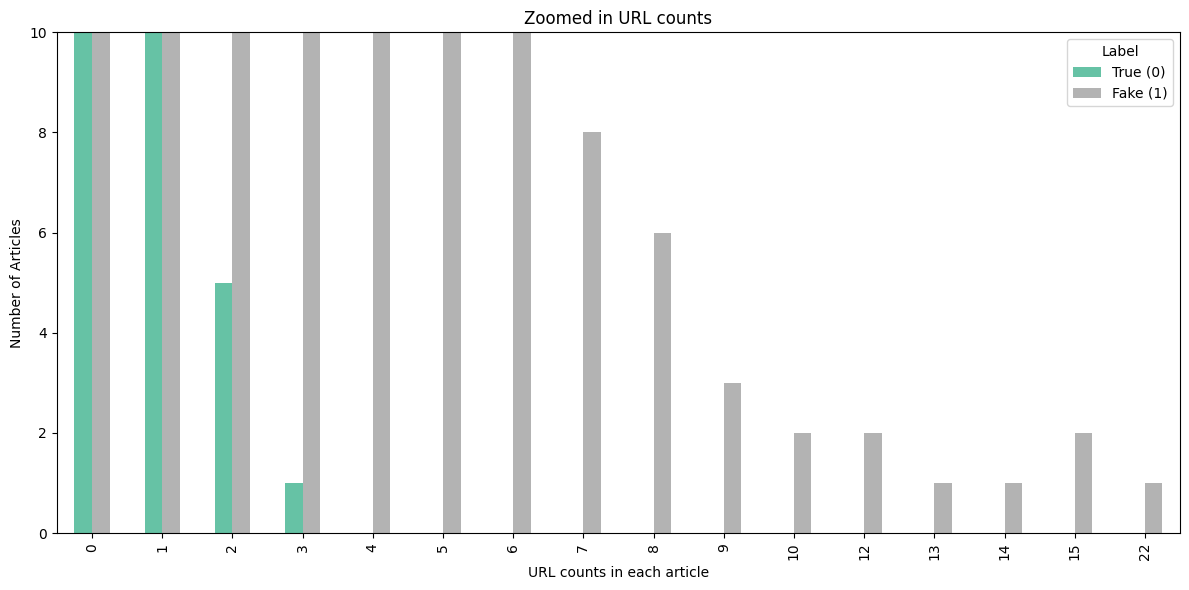

In [24]:
# Plot grouped bar chart
grouped_filtered.plot(kind='bar', figsize=(12,6), colormap='Set2')

plt.title('Zoomed in URL counts')
plt.xlabel('URL counts in each article')
plt.ylabel('Number of Articles')
plt.legend(title='Label', labels=['True (0)', 'Fake (1)'])
plt.ylim(0,10)
plt.tight_layout()
plt.show()

In [25]:
# Create a feature counting number of quote pairs in the text
'''Function to count number of quote pairs 
param @text a column of text
return @quote_pairs
'''
def count_quotation_pairs(text):
    double_quotes = text.count('"')
    single_quotes = text.count("'")
    #Pair up the quotes (each pair of quotes counts as a pair)
    quote_pairs = (double_quotes // 2) + (single_quotes // 2)

    return quote_pairs

In [26]:
df['quote pairs'] = df['text'].apply(count_quotation_pairs)


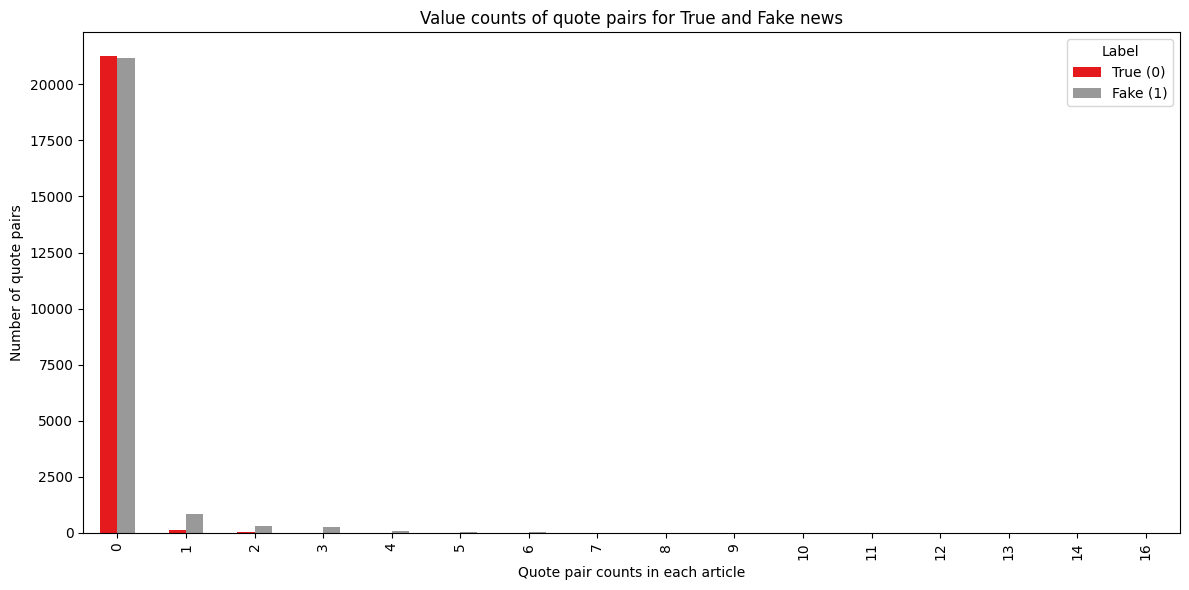

In [27]:
grouped = df.groupby(['quote pairs', 'label']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12,6), colormap='Set1')

plt.title('Value counts of quote pairs for True and Fake news')
plt.xlabel('Quote pair counts in each article')
plt.ylabel('Number of quote pairs')
plt.legend(title='Label', labels=['True (0)', 'Fake (1)'])
plt.tight_layout()
plt.show()


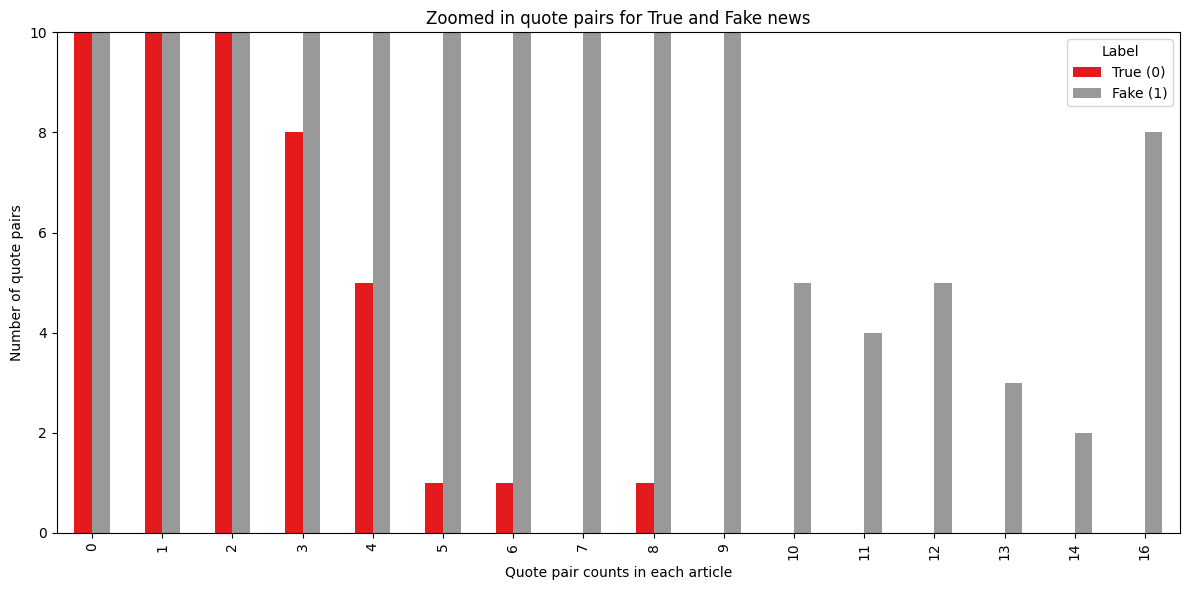

In [28]:
# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12,6), colormap='Set1')

plt.title('Zoomed in quote pairs for True and Fake news')
plt.xlabel('Quote pair counts in each article')
plt.ylabel('Number of quote pairs')
plt.ylim(0,10)
plt.legend(title='Label', labels=['True (0)', 'Fake (1)'])
plt.tight_layout()
plt.show()

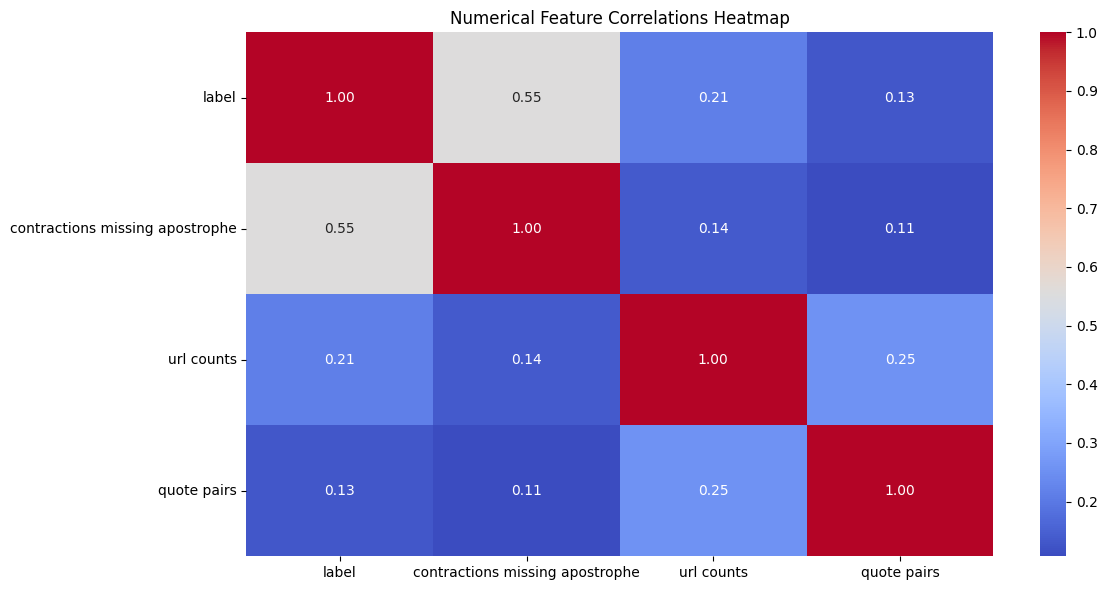

In [29]:
# Heatmap plotting 
# Drop non-numerical columns for correlation heatmap plotting
numeric_df = df.drop(columns=['title', 'text', 'subject', 'date'])

# Calculate correlations
correlation_matrix = numeric_df.corr()

# Plot heatmap 
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numerical Feature Correlations Heatmap')
plt.tight_layout()
plt.show()


### Text preprocessing

In [30]:
# Neccessary packages and documents for preprocessing the text 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huongnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/huongnguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/huongnguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/huongnguyen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
'''Function to apply text-preprocessing methods to create a simpler cleaned text for model building task
   param @text: a column in df 
   return @ preprocessed sentences for each row 
'''

# Initiate stop_words list specifically for english language and initiate lemmatizer as we need to convert the word to its root form based on context
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()  

# To process one row at a time 
def clean_text(text):
    # Convert text from uppercase to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.S+', '', text)
    # Remove special characters and only keeping letters
    text = re.sub(r'[^a-zA-Z\s+]', '', text)  # [^...] is Negation meaning not these characters
    # Tokenize (split) text into smaller parts (word unit)
    words = word_tokenize(text)
    # Select the words not in stopwords then apply lemmatization, which converts word to its root form based on context
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)  #join the words into a sentence and output for each row

In [32]:
# Apply clean_text function to each row in column 'text' 
df['cleaned text'] = df['text'].apply(clean_text)
df.head(10) # takes about 30 seconds

,title,text,subject,date,label,contractions missing apostrophe,url counts,quote pairs,cleaned text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,1,0,0,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,1,0,0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,1,1,0,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,1,4,0,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,0,0,0,pope francis used annual christmas day message...
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1,0,0,0,number case cop brutalizing killing people col...
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1,1,0,0,donald trump spent good portion day golf club ...
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1,1,0,0,wake yet another court decision derailed donal...
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1,0,0,0,many people raised alarm regarding fact donald...
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1,1,0,0,might thought get break watching people kiss d...


In [33]:
# Create a cleaned text for each sub-data set for further analysis 
df_fake['cleaned text'] = df_fake['text'].apply(clean_text)
df_true['cleaned text'] = df_true['text'].apply(clean_text)

In [34]:
'''Function to examine the longest and shortest text
    param @text: a column in df
    @return print out longest text length and shortest text length of the entire column. 
'''
def find_length(text):  # To process the entire column to find the longest and shortest
    
    longest_text = len(text[0].split())
    shortest_text = len(text[0].split())
    
    for t in text[1:]:
        length = len(t.split())

        if length < shortest_text:
            shortest_text = length

        if length > longest_text:
            longest_text = length
    
    print(f' Longest: {longest_text}, Shortest: {shortest_text}')            

In [35]:
# Find the longest and shortest text length for column 'text' and col 'cleaned text'
print('Raw text:')
find_length(df['text'])

print('Cleaned text:')
find_length(df['cleaned text'])

Raw text:
 Longest: 8135, Shortest: 1
Cleaned text:
 Longest: 4841, Shortest: 0


In [36]:
# Examine the contents of the shortest raw texts (which is length of 1)
shortest_contents = df[df['cleaned text'].str.split().str.len() == 0]

shortest_contents

,title,text,subject,date,label,contractions missing apostrophe,url counts,quote pairs,cleaned text
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,0,1,0,
11243,MELANIA TRUMP GIVES POWERFUL SPEECH to Honor ‘...,https://www.youtube.com/watch?v=cJZFepSvxzM,politics,"Mar 30, 2017",1,0,1,0,
11273,TERRORISM EXPERT SEBASTIAN GORKA On What Next ...,https://www.youtube.com/watch?v=-7Tn4gi_Os8,politics,"Mar 26, 2017",1,0,1,0,
11275,TRUMP CABINET MEMBER MICK MULVANEY ON DC: “Thi...,https://www.youtube.com/watch?time_continue=2&...,politics,"Mar 26, 2017",1,0,1,0,
11291,CRYBABY NANCY PELOSI Taunts Trump On Healthcar...,https://www.youtube.com/watch?v=SH0pRtK9sAE,politics,"Mar 24, 2017",1,0,1,0,
...,...,...,...,...,...,...,...,...,...
18997,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,left-news,"Nov 23, 2016",1,0,1,0,
19004,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,left-news,"Nov 22, 2016",1,0,1,0,
19043,TRUMP SUPPORTER Whose Brutal Beating By Black ...,https://youtu.be/kKFQ5i9jXmA,left-news,"Nov 14, 2016",1,0,1,0,
21240,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,0,1,0,


In [37]:
# Examine the label of these shortest length text
shortest_contents['label'].value_counts()

label
1    85
Name: count, dtype: int64

Note: The shortest contents text are Fake news

In [38]:
# Preview the shortest contents
shortest_contents[['text']]

,text
9358,https://100percentfedup.com/served-roy-moore-v...
11243,https://www.youtube.com/watch?v=cJZFepSvxzM
11273,https://www.youtube.com/watch?v=-7Tn4gi_Os8
11275,https://www.youtube.com/watch?time_continue=2&...
11291,https://www.youtube.com/watch?v=SH0pRtK9sAE
...,...
18997,https://twitter.com/Rosie/status/8009393386158...
19004,https://youtu.be/0J4xPRYbsLU
19043,https://youtu.be/kKFQ5i9jXmA
21240,https://fedup.wpengine.com/wp-content/uploads/...


Note: Most of the Fake news' shortest content of length 1 is URL. 

In [39]:
# Drop the rows with empty string after text cleaning
df = df[df['cleaned text'].str.strip() != ''].reset_index(drop=True)  
print(f'Original: {orig_shape} Current:{df.shape}')
print(f'We retained {df.shape[0]/orig_shape[0]*100:.2f}% of the dataset')

Original: (44898, 5) Current:(44182, 9)
We retained 98.41% of the dataset


### TF-IDF 

In [40]:
# Visualize the TF-IDF word cloud  
# This code is for visualization purpose only, we will perform TF-IDF as features during pipeline building step

from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorizer(data_set, max_features=1000):
    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer(
    min_df=10,     # Ignore words that appear in fewer than 10 articles
    max_df=0.9,   # Ignore words that appear in more than 90% of the documents
    ngram_range=(2, 2),    # Only bigrams
    token_pattern=r'\b[a-zA-Z]{3,}\b'  # Keep only words with at least 3 letters
                                    )
    
    # Fit the model and transform the data
    tfidf_matrix = vectorizer.fit_transform(data_set['cleaned text'])

    # Get feature names (bi-gram words) 
    feature_names = vectorizer.get_feature_names_out()

    # Average TF-IDF score across all documents for each word
    avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1 # convert sparse matrix to 1D array

    # Zip them together and sort
    word_scores = dict(zip(feature_names, avg_tfidf_scores))

    return word_scores # Dictionary format
   


In [41]:
# Apply TFIDF on combined df 
df_word_scores = tfidf_vectorizer(df)

# Apply TFIDF on Fake and True sub dataset
fake_word_scores = tfidf_vectorizer(df_fake)
true_word_scores = tfidf_vectorizer(df_true)

In [42]:
# Create word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(word_scores, dataset='combined df'):

    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(word_scores)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Top TF-IDF Words"+" "+dataset)
    plt.show()

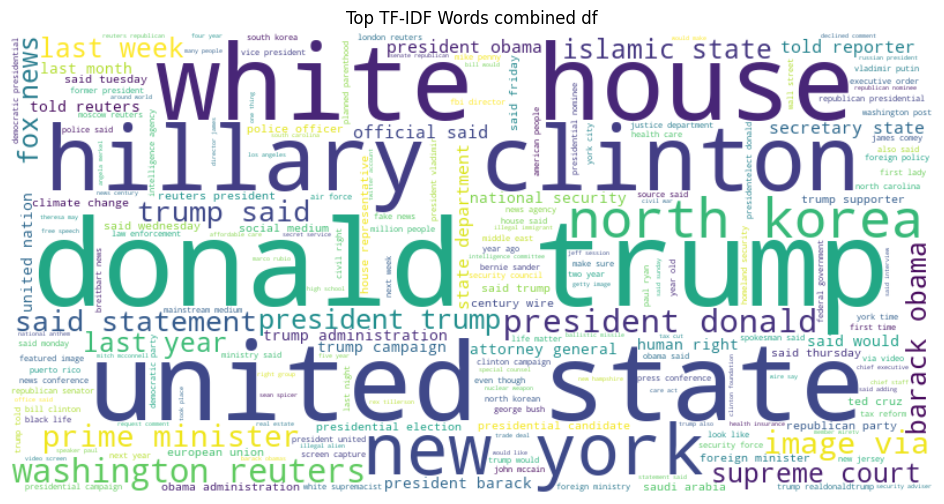

In [43]:
# Apply on combined dataset
word_cloud(df_word_scores)

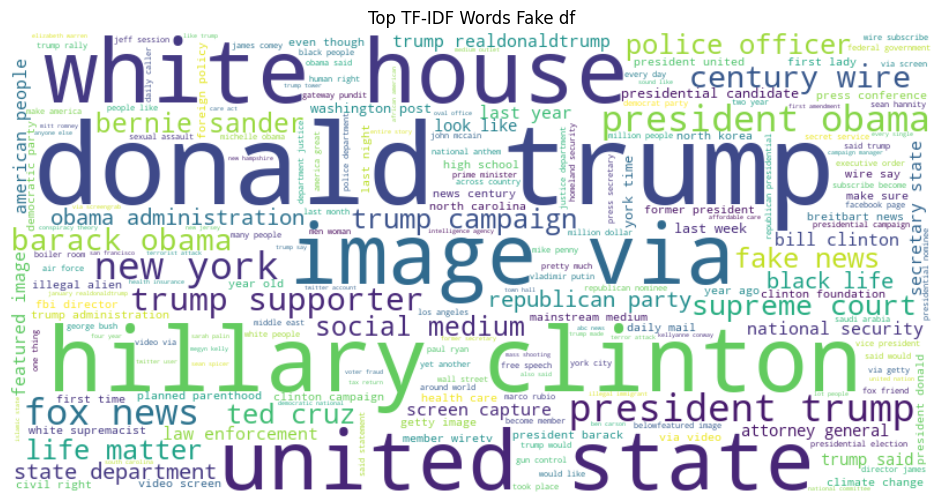

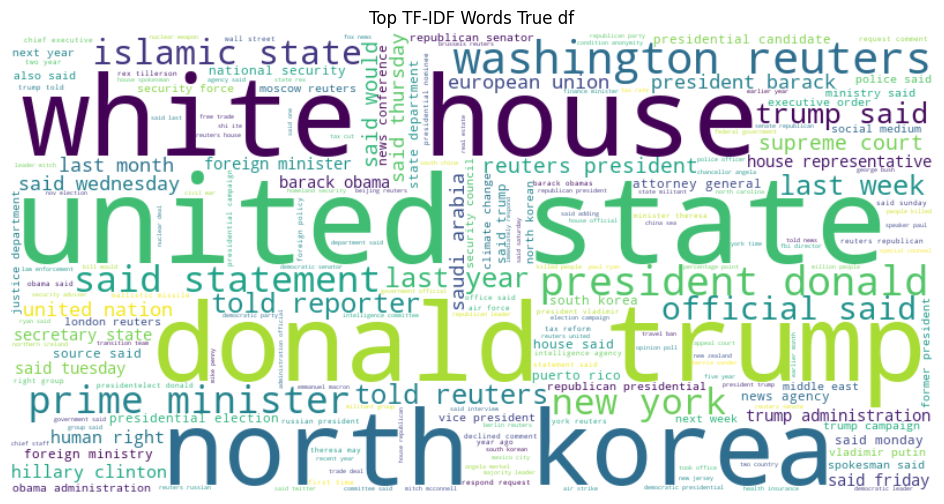

In [44]:
# Apply on each subset
word_cloud(fake_word_scores, dataset='Fake df')
print()
word_cloud(true_word_scores, dataset='True df')

### Sentiment score using VADER lexicon

In [45]:
# Assign a sentiment score to each article using VADER module
from nltk.sentiment import SentimentIntensityAnalyzer

# Dowload VADER lexicon
nltk.download('vader_lexicon')

''' Function to assign a sentiment score to each article
param @text a column of df
return @compound_score range -1 to 1 with the lower score, the more negative and vice versa, 0 is neutral 
'''
# Initialize the SentimentIntensityAnalyzer once in order to apply map at a later step for faster processing
sia = SentimentIntensityAnalyzer()

def sentiment_score(text, sia):

    # Handle missing or non-string values
    if not isinstance(text, str) or text.strip() == '': 
        return None

    # Get compound sentiment scores
    compound_score = sia.polarity_scores(text)['compound']

    return compound_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/huongnguyen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
# Apply sentiment_score function on 'cleaned text' and create column 'sentiment' attribute on df
# Use Vectorized Processing with map() instead of apply() for faster processing
df['vader_sentiment'] = df['cleaned text'].map(lambda x: sentiment_score(x, sia))
df.head() # takes about 40 seconds

,title,text,subject,date,label,contractions missing apostrophe,url counts,quote pairs,cleaned text,vader_sentiment
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,1,0,0,donald trump wish american happy new year leav...,0.9678
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,1,0,0,house intelligence committee chairman devin nu...,0.6300
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,1,1,0,friday revealed former milwaukee sheriff david...,-0.9933
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,1,4,0,christmas day donald trump announced would bac...,0.1316
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,0,0,0,pope francis used annual christmas day message...,0.9105


### Readability score


In [48]:
import textstat

'''Using a separating cleanted text for calculating readability score
This temp_cleaned_text specifically for Flesch reading ease score contains some characteristics suitable for calculating readability score 
param @text: the raw text column 
return @temp_cleaned_text column 
'''


def readability_cleaning_text(text):
    # Convert text from uppercase to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.S+', '', text)
    # Substitute special characters %, &, $ with actual words
    text = text.replace('&', ' and ').replace('$', ' dollars ').replace('%', ' percent ')  
    # Split hyphenated words (e.g., "state-of-the-art" -> "state of the art")
    text = re.sub(r'(?<=\w)-(?=\w)', ' ', text)
    # Tokenize (split) text into smaller parts (word unit)
    words = word_tokenize(text)
    # Select the words not in stopwords then apply lemmatization, which converts word to its root form based on context
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)  #join the words into a sentence and output for each row

# Create a second cleaned text column temporarily used for calculating Flesch Reading score
# This column temp_cleaned_text will be removed before pipeline as we don't need it for the pipeline
df['temp_cleaned_text'] = df['text'].apply(readability_cleaning_text)

In [49]:
# Apply Flesch Reading score, higher score means easier to read and vice versa 
df['flesch_reading_ease'] = df['temp_cleaned_text'].apply(textstat.flesch_reading_ease)

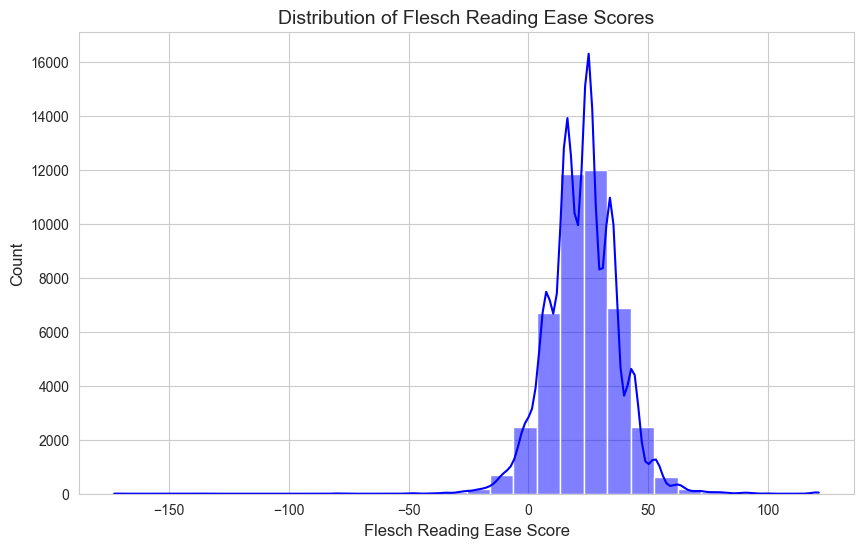

In [50]:
# Histogram of the distribution of Flesch Reading score
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.histplot(df['flesch_reading_ease'], bins=30, kde=True, color='blue')

# Add title and labels
plt.title('Distribution of Flesch Reading Ease Scores', fontsize=14)
plt.xlabel('Flesch Reading Ease Score', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

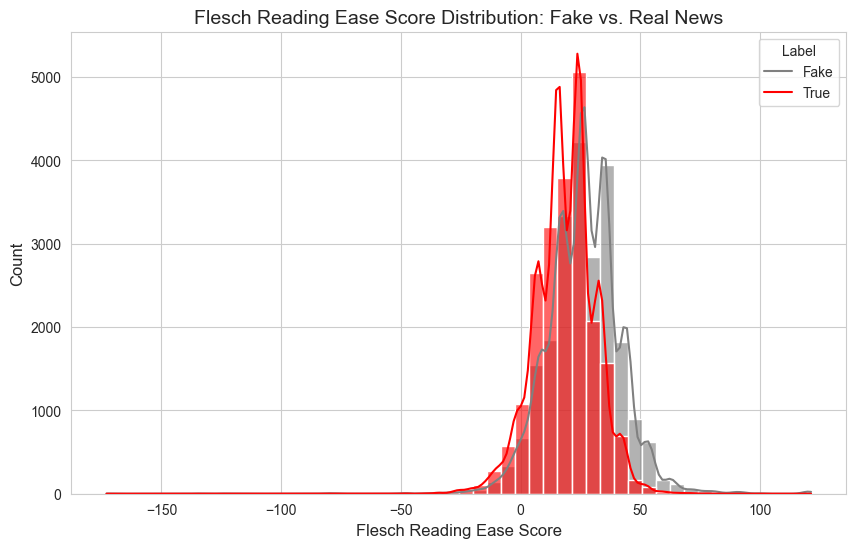

In [51]:
# Histogram of Flesch Reading score with label feature coloring 
# Set plot size and style
plt.figure(figsize=(10, 6))

# Plot histogram with different colors for fake and real news
sns.histplot(data=df, x='flesch_reading_ease', hue='label', bins=50, kde=True, palette={0: 'red', 1: 'gray'}, alpha=0.6)

# Add title and labels
plt.title('Flesch Reading Ease Score Distribution: Fake vs. Real News', fontsize=14)
plt.legend(title='Label', labels=['Fake', 'True'])
plt.xlabel('Flesch Reading Ease Score', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


Note: Fake news are easier to read compared to True news (Higher score means easier readability). However, there are a lot of overlapping Flesch scores between True and Fake news. 

In [52]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label',
       'contractions missing apostrophe', 'url counts', 'quote pairs',
       'cleaned text', 'vader_sentiment', 'temp_cleaned_text',
       'flesch_reading_ease'],
      dtype='object')

In [53]:
# Drop unwanted columns before creating pipeline
df = df.drop(columns=['title', 'text', 'date', 'temp_cleaned_text'])

In [54]:
df.head()

,subject,label,contractions missing apostrophe,url counts,quote pairs,cleaned text,vader_sentiment,flesch_reading_ease
0,News,1,1,0,0,donald trump wish american happy new year leav...,0.9678,43.69
1,News,1,1,0,0,house intelligence committee chairman devin nu...,0.6300,18.42
2,News,1,1,1,0,friday revealed former milwaukee sheriff david...,-0.9933,44.00
3,News,1,1,4,0,christmas day donald trump announced would bac...,0.1316,33.92
4,News,1,0,0,0,pope francis used annual christmas day message...,0.9105,43.29


In [55]:
# Export the dataframe as a csv file and ready to be used for the Project
df.to_csv('/Users/huongnguyen/BDA-602-Spring-2025/fake_or_real/preprocessed_df.csv')